In [1]:
import pandas as pd
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import datetime
from google.colab import drive
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import seaborn as sns
from scipy.stats.mstats import winsorize
import sklearn
drive.mount('/content/drive')

Mounted at /content/drive


Data Load

In [3]:
trainSet = pd.read_csv('/content/drive/MyDrive/Results/trainSet.csv')
# testSet = pd.read_csv('/content/drive/MyDrive/Results/testSet.csv')

In [4]:
X = trainSet.drop(['isFraud'], axis=1)
y = trainSet['isFraud']

# **I, Models Deployment**

**1. Random Forest Classifier**

In [185]:
# Split The data into 2 Pieces
X_train1, X_val1, y_train1, y_val1 = train_test_split(X, y, train_size = 0.70, stratify = y, random_state = 40)

In [186]:
randForest = RandomForestClassifier() 
# use default Tree number = 100 in default.
randForest.fit(X_train1, y_train1)

RandomForestClassifier()

In [211]:
# validate to get Score Observed.
y_pred11 = randForest.predict(X_train1)
print(classification_report(y_train1, y_pred11, zero_division=0))
y_pred12 = randForest.predict(X_val1)
print(classification_report(y_val1, y_pred12, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    398914
           1       1.00      1.00      1.00     14464

    accuracy                           1.00    413378
   macro avg       1.00      1.00      1.00    413378
weighted avg       1.00      1.00      1.00    413378

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170963
           1       0.95      0.43      0.59      6199

    accuracy                           0.98    177162
   macro avg       0.97      0.71      0.79    177162
weighted avg       0.98      0.98      0.98    177162



In [187]:
print('Random Forest Valid ROC - AUC score:', roc_auc_score(y_val1, randForest.predict_proba(X_val1)[:, 1]))
print('Random Forest Train ROC AUC score:', roc_auc_score(y_train1, randForest.predict_proba(X_train1)[:, 1]))

Random Forest Valid ROC - AUC score: 0.9335175970625474
Random Forest Train ROC AUC score: 1.0


In [254]:
randForest.fit(X, y)

RandomForestClassifier()

**2. XGBoost: Thuật toán quốc dân của Kaggler**

In [225]:
# Initialize XGBoost models fitting Data Above.
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, train_size = 0.70, stratify = y, random_state =40)
XGBst = XGBClassifier()
XGBst.fit(X_train2, y_train2)

XGBClassifier()

In [226]:
# Evaluate Metrics
y_pred21 = XGBst.predict(X_train2)
y_pred22 = XGBst.predict(X_val2)
print(classification_report(y_train2, y_pred21, zero_division=0))
print(classification_report(y_val2, y_pred22, zero_division=0))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    398914
           1       0.86      0.26      0.40     14464

    accuracy                           0.97    413378
   macro avg       0.92      0.63      0.69    413378
weighted avg       0.97      0.97      0.97    413378

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    170963
           1       0.85      0.26      0.40      6199

    accuracy                           0.97    177162
   macro avg       0.91      0.63      0.69    177162
weighted avg       0.97      0.97      0.97    177162



In [227]:
# Evaluate ROC - AUC curves
print('XGBoost Valid ROC - AUC score:', roc_auc_score(y_val2, XGBst.predict_proba(X_val2)[:, 1]))
print('XGBoost Train ROC - AUC score:', roc_auc_score(y_train2, XGBst.predict_proba(X_train2)[:, 1]))

XGBoost Valid ROC - AUC score: 0.881987495434479
XGBoost Train ROC - AUC score: 0.8838235490634728


**3. LightGBM**

In [222]:
import lightgbm
from lightgbm import LGBMClassifier as lgbm
# Inititalize LightGBM model
X_train3, X_val3, y_train3, y_val3 = train_test_split(X, y, train_size = 0.70, stratify = y, random_state = 40)
LightMod = lgbm(
    max_bin = 50,  # max feature in 76 feature sum of dataset, but it may slow down train time
    boosting_type = 'gbdt',
    objective = 'binary',
    metric = 'auc',
    sub_feature = 0.5,
    num_leaves = 255, # fine tune <= pow(2, max_depth)
    min_data_in_leaf = 1,
    max_depth = 10,
    seed = 40,
    feature_fraction_seed = 40,
    bagging_seed = 40,
    drop_seed = 40,
    data_random_seed = 40,
    is_unbalance = True,
    save_binary = True,     # boosting speed convex
    is_dfing_metric  = False,
    num_iterations = 500,
    min_sum_hessian_in_leaf = 100, # useful
    sparse_threshold = 1.0,
    tree_learner = 'serial',
    verbose = 1,
    boost_from_average = False
)
LightMod.fit(X_train3, y_train3)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



LGBMClassifier(bagging_seed=40, boost_from_average=False, data_random_seed=40,
               drop_seed=40, feature_fraction_seed=40, is_dfing_metric=False,
               is_unbalance=True, max_bin=50, max_depth=10, metric='auc',
               min_data_in_leaf=1, min_sum_hessian_in_leaf=100,
               num_iterations=500, num_leaves=255, objective='binary',
               save_binary=True, seed=40, sparse_threshold=1.0, sub_feature=0.5,
               tree_learner='serial', verbose=1)

In [223]:
# Prediction and Evaluate
y_pred32 = LightMod.predict(X_val3)
y_pred31 = LightMod.predict(X_train3)
print(classification_report(y_val3, y_pred32, zero_division=0))
print(classification_report(y_train3, y_pred31, zero_division=0))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    170963
           1       0.47      0.81      0.60      6199

    accuracy                           0.96    177162
   macro avg       0.73      0.89      0.79    177162
weighted avg       0.97      0.96      0.97    177162

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    398914
           1       0.57      0.98      0.72     14464

    accuracy                           0.97    413378
   macro avg       0.78      0.98      0.85    413378
weighted avg       0.98      0.97      0.98    413378



In [224]:
# ROC - AUC Evaluate
print('LightGBM Valid ROC - AUC score:', roc_auc_score(y_val3, LightMod.predict_proba(X_val3)[:, 1]))
print('LightGBM Train ROC - AUC score:', roc_auc_score(y_train3, LightMod.predict_proba(X_train3)[:, 1]))

LightGBM Valid ROC - AUC score: 0.9596925659260251
LightGBM Train ROC - AUC score: 0.9971161573348079


In [248]:
LightMod.fit(X, y)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



LGBMClassifier(bagging_seed=40, boost_from_average=False, data_random_seed=40,
               drop_seed=40, feature_fraction_seed=40, is_dfing_metric=False,
               is_unbalance=True, max_bin=50, max_depth=10, metric='auc',
               min_data_in_leaf=1, min_sum_hessian_in_leaf=100,
               num_iterations=500, num_leaves=255, objective='binary',
               save_binary=True, seed=40, sparse_threshold=1.0, sub_feature=0.5,
               tree_learner='serial', verbose=1)

**3. Multilayer Perceptron**

In [9]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import Subset
from torch.utils.tensorboard import SummaryWriter
import torchvision

In [6]:
trainSetLight = pd.read_csv('/content/drive/MyDrive/Results/trainSetLight.csv')

In [28]:
X_lite = trainSetLight.drop(['isFraud'], axis=1)
y_lite = trainSetLight['isFraud']

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
!pip install pytorch_lightning

In [12]:
import pytorch_lightning as pl
import math

In [163]:
# Convert Dataset to pytorch Tensor
targets = torch.tensor(y_lite.values.astype(np.float32).reshape(-1, 1))
features = torch.tensor(X_lite.values.astype(np.float32))
trainSetLite = TensorDataset(features, targets)
# train_loader = data_utils.DataLoader(trainSetLite, batch_size=16, shuffle=True)
# Split datasets into 25% validation and 75% train with Hyper parameter batch size = 16.
train_idx, val_idx = train_test_split(list(range(len(trainSetLite))), test_size=0.25)
datasets = {}
datasets['train'] = Subset(trainSetLite, train_idx)
datasets['validate'] = Subset(trainSetLite, val_idx)
dataloaders = {x:DataLoader(datasets[x], 32, shuffle=False, num_workers= 1) for x in ['train','validate']}

In [167]:
# Constructing NN in Pytorch Lightning
class NeuralNet(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.LayerNorm(40),
      nn.Linear(40, 500, bias = True), # Corresponding 40 features of Lite Dataset
      nn.LeakyReLU(),
      nn.Linear(500, 100, bias = True),
      nn.ReLU(),
      nn.Linear(100, 1, bias = True),
      nn.Sigmoid()
    )
    self.ce = torch.nn.MSELoss()
    
  def forward(self, x):
    return self.layers(x)

  def training_step(self, batch, batch_idx):
    x, y = batch
    x = x.view(x.size(0), -1)
    y_hat = self.layers(x)
    loss = self.ce(y_hat, y)
    self.log('train_loss', loss)
    return loss
  
  def configure_optimizers(self):
    optimizer = torch.optim.SGD(modelnn.parameters(), lr=0.0001, momentum = 0.9, weight_decay=0.0001)
    return optimizer

In [168]:
modelnn = NeuralNet()
# As Long Using Stochastic Gradient Descent to optimizing model params
# Hyper Parameter learning rate = 0.0001 and momentum = 0.9 to pass the local Extreme point. Need to statistical in more time training.
# Using Cross Entropy Loss Error.
training_loader = torch.utils.data.DataLoader(datasets['train'], batch_size=32, shuffle=True, num_workers=1, pin_memory=False)
validation_loader = torch.utils.data.DataLoader(datasets['validate'], batch_size=32, shuffle=True, num_workers=1, pin_memory=False)

In [169]:
pl.seed_everything(40)
trainer = pl.Trainer(gpus=0, deterministic=True, max_epochs=20)
trainer.fit(modelnn, training_loader)

Global seed set to 40
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 70.8 K
1 | ce     | MSELoss    | 0     
--------------------------------------
70.8 K    Trainable params
0         Non-trainable params
70.8 K    Total params
0.283     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f72c79abb00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


In [176]:
type(datasets['validate'])

torch.utils.data.dataset.Subset

In [175]:
y_pred_nn = modelnn(features)

tensor([[0.0371],
        [0.0355],
        [0.0359],
        ...,
        [0.0355],
        [0.0355],
        [0.0355]], grad_fn=<SigmoidBackward0>)

In [204]:
yprednn = y_pred_nn.detach().numpy().reshape(590540)

In [208]:
# ROC - AUC Evaluate
print('Neural Network Valid ROC - AUC score:', roc_auc_score(y_lite, yprednn))

Neural Network Valid ROC - AUC score: 0.4360295511232152


**S. LightGBM with Lite Dataset**

In [215]:
import lightgbm
from lightgbm import LGBMClassifier as lgbm

In [217]:
X_trainLite, X_valLite, y_trainLite, y_valLite = train_test_split(X_lite, y_lite, train_size = 0.70, stratify = y, random_state = 40)
LightLite = lgbm(
    max_bin = 50,  # max feature in 76 feature sum of dataset, but it may slow down train time
    boosting_type = 'gbdt',
    objective = 'binary',
    metric = 'auc',
    sub_feature = 0.5,
    num_leaves = 255, # fine tune <= pow(2, max_depth)
    min_data_in_leaf = 1,
    max_depth = 10,
    seed = 40,
    feature_fraction_seed = 40,
    bagging_seed = 40,
    drop_seed = 40,
    data_random_seed = 40,
    is_unbalance = True,
    save_binary = True,     # boosting speed convex
    is_dfing_metric  = False,
    num_iterations = 500,
    min_sum_hessian_in_leaf = 100, # useful
    sparse_threshold = 1.0,
    tree_learner = 'serial',
    verbose = 1,
    boost_from_average = False
)
LightLite.fit(X_trainLite, y_trainLite)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



LGBMClassifier(bagging_seed=40, boost_from_average=False, data_random_seed=40,
               drop_seed=40, feature_fraction_seed=40, is_dfing_metric=False,
               is_unbalance=True, max_bin=50, max_depth=10, metric='auc',
               min_data_in_leaf=1, min_sum_hessian_in_leaf=100,
               num_iterations=500, num_leaves=255, objective='binary',
               save_binary=True, seed=40, sparse_threshold=1.0, sub_feature=0.5,
               tree_learner='serial', verbose=1)

In [218]:
# Prediction and Evaluate with Lite Dataset
y_predLiteVal = LightLite.predict(X_valLite)
y_predLiteTrain = LightLite.predict(X_trainLite)
print(classification_report(y_valLite, y_predLiteVal, zero_division=0))
print(classification_report(y_trainLite, y_predLiteTrain, zero_division=0))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    170963
           1       0.48      0.80      0.60      6199

    accuracy                           0.96    177162
   macro avg       0.74      0.89      0.79    177162
weighted avg       0.97      0.96      0.97    177162

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    398914
           1       0.58      0.99      0.73     14464

    accuracy                           0.97    413378
   macro avg       0.79      0.98      0.86    413378
weighted avg       0.98      0.97      0.98    413378



In [221]:
# ROC - AUC Evaluate
print('LightGBM Valid with Lite Data ROC - AUC score:', roc_auc_score(y_valLite, LightLite.predict_proba(X_valLite)[:, 1]))
print('LightGBM Train with Lite Data ROC - AUC score:', roc_auc_score(y_trainLite, LightLite.predict_proba(X_trainLite)[:, 1]))

LightGBM Valid with Lite Data ROC - AUC score: 0.9580798837356085
LightGBM Train with Lite Data ROC - AUC score: 0.9975235393032904


In [251]:
LightLite.fit(X_lite, y_lite)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



LGBMClassifier(bagging_seed=40, boost_from_average=False, data_random_seed=40,
               drop_seed=40, feature_fraction_seed=40, is_dfing_metric=False,
               is_unbalance=True, max_bin=50, max_depth=10, metric='auc',
               min_data_in_leaf=1, min_sum_hessian_in_leaf=100,
               num_iterations=500, num_leaves=255, objective='binary',
               save_binary=True, seed=40, sparse_threshold=1.0, sub_feature=0.5,
               tree_learner='serial', verbose=1)

# **II, Evaluation**

In [233]:
# Random Forest
y_pred = randForest.predict(X_val1)
RF_recall = recall_score(y_val1, y_pred)
RF_f1 = f1_score(y_val1, y_pred)
RF_auc = roc_auc_score(y_val1, randForest.predict_proba(X_val1)[:, 1])

# XGBoost
y_pred = XGBst.predict(X_val2)
XGB_recall = recall_score(y_val2, y_pred)
XGB_f1 = f1_score(y_val2, y_pred)
XGB_auc = roc_auc_score(y_val2, XGBst.predict_proba(X_val2)[:, 1])

# LightGBM
y_pred = LightMod.predict(X_val3)
LGBM_recall = recall_score(y_val3, y_pred)
LGBM_f1 = f1_score(y_val3, y_pred)
LGBM_auc = roc_auc_score(y_val3, LightMod.predict_proba(X_val3)[:, 1])

# Neural Net
NN_auc = roc_auc_score(y_lite, yprednn)

# Evaluation Table
evaluation =pd.DataFrame({ 'MODEL':["Random Forest", "XGBoost", "LightGBM", "MLP"], 'RECALL':[RF_recall, XGB_recall, LGBM_recall, np.nan],
                                                'F1':[RF_f1, XGB_f1, LGBM_f1, np.nan], 'AUC':[RF_auc, XGB_auc, LGBM_auc, NN_auc]})

In [234]:
evaluation

,MODEL,RECALL,F1,AUC
0,Random Forest,0.428456,0.591142,0.933518
1,XGBoost,0.259719,0.397776,0.881987
2,LightGBM,0.806582,0.595628,0.959693
3,MLP,NaN,NaN,0.436030


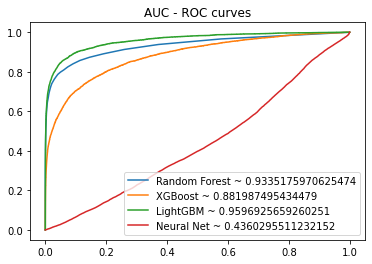

In [237]:
from sklearn import metrics
plt.figure()
y_pred = randForest.predict_proba(X_val1)[:, 1]
FPR, TPR, _ = metrics.roc_curve(y_val1, y_pred)
plt.plot(FPR, TPR, label = "Random Forest ~ " + str(metrics.roc_auc_score(y_val1, y_pred)))
y_pred = XGBst.predict_proba(X_val2)[:, 1]
FPR, TPR, _ = metrics.roc_curve(y_val2, y_pred)
plt.plot(FPR, TPR, label = "XGBoost ~ " + str(metrics.roc_auc_score(y_val2, y_pred)))
y_pred = LightMod.predict_proba(X_val3)[:, 1]
FPR, TPR, _ = metrics.roc_curve(y_val3, y_pred)
plt.plot(FPR, TPR, label = "LightGBM ~ " + str(metrics.roc_auc_score(y_val3, y_pred)))
FPR, TPR, _ = metrics.roc_curve(y_lite, yprednn)
plt.plot(FPR, TPR, label = "Neural Net ~ " + str(metrics.roc_auc_score(y_lite, yprednn)))

plt.title("AUC - ROC curves")
plt.legend()
plt.show()

# **III, Predict Kaggle Test**

In [238]:
testSet = pd.read_csv('/content/drive/MyDrive/Results/testSet.csv')

In [249]:
# After read the Dataset, Use form Submission to fill the Final results
my_submission= pd.read_csv('/content/drive/MyDrive/IFE/sample_submission.csv')
my_submission['isFraud'] = pd.DataFrame(LightMod.predict_proba(testSet))[[1]]

In [250]:
my_submission.to_csv('/content/drive/MyDrive/Results/my_submission.csv', index = False)

In [242]:
my_submission.head(10)

,TransactionID,isFraud
0,3663549,0.018043
1,3663550,0.025888
2,3663551,0.013508
3,3663552,0.088501
4,3663553,0.003102
5,3663554,0.041617
6,3663555,0.025514
7,3663556,0.127346
8,3663557,0.000695
9,3663558,0.138352


In [243]:
my_submission.tail(10)

,TransactionID,isFraud
506681,4170230,0.070244
506682,4170231,0.338514
506683,4170232,0.003323
506684,4170233,0.004723
506685,4170234,0.020583
506686,4170235,0.076631
506687,4170236,0.013525
506688,4170237,0.052313
506689,4170238,0.082660
506690,4170239,0.005981


In [245]:
testSet2 = pd.read_csv('/content/drive/MyDrive/Results/testSetLight.csv')

In [252]:
# After read the Dataset, Use form Submission to fill the Final results
my_submission2= pd.read_csv('/content/drive/MyDrive/IFE/sample_submission.csv')
my_submission2['isFraud'] = pd.DataFrame(LightLite.predict_proba(testSet2))[[1]]
my_submission2.to_csv('/content/drive/MyDrive/Results/my_submission2.csv', index = False)

In [255]:
my_submission3= pd.read_csv('/content/drive/MyDrive/IFE/sample_submission.csv')
my_submission3['isFraud'] = pd.DataFrame(randForest.predict_proba(testSet))[[1]]
my_submission3.to_csv('/content/drive/MyDrive/Results/my_submission3.csv', index = False)

In [256]:
# Random Forest Fit the Lite Data
randForest.fit(X_lite, y_lite)

RandomForestClassifier()

In [257]:
my_submission4= pd.read_csv('/content/drive/MyDrive/IFE/sample_submission.csv')
my_submission4['isFraud'] = pd.DataFrame(randForest.predict_proba(testSet2))[[1]]
my_submission4.to_csv('/content/drive/MyDrive/Results/my_submission4.csv', index = False)